In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22607


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22602,2021-05-06,47,沖縄県,39,12817,0,137
22603,2021-05-07,47,沖縄県,82,12899,1,138
22604,2021-05-08,47,沖縄県,93,12992,0,138
22605,2021-05-09,47,沖縄県,103,13095,0,138
22606,2021-05-10,47,沖縄県,36,13131,1,139


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10582,6889,127
43,香川県,17797,1592,23
44,高知県,18759,1123,20
45,鳥取県,14911,403,2
46,鹿児島県,22126,2597,28


## 人口データを付与

In [4]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [5]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,人口
0,三重県,11544,4171,91,1813859
1,京都府,12506,13813,194,2545899
2,佐賀県,19721,1996,14,823810
3,兵庫県,13468,35553,797,5549568
4,北海道,481,27090,901,5267762


## 人口当たりの感染者数

In [6]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,人口,１万人当たりの感染者数,10万人当たりの感染者数
4,北海道,481,27090,901,5267762,51.426014,514.260136
41,青森県,962,1813,26,1275783,14.210881,142.108807
19,岩手県,1443,1104,36,1235517,8.935531,89.355306
11,宮城県,1924,8353,74,2292385,36.438033,364.380329
36,秋田県,2405,601,9,985416,6.098947,60.989470
15,山形県,2886,1608,36,1082296,14.857303,148.573034
35,福島県,3367,3928,129,1881981,20.871624,208.716241
38,茨城県,3848,8607,135,2921436,29.461539,294.615388
27,栃木県,4329,5628,72,1965516,28.633702,286.337023
37,群馬県,4810,6768,107,1969439,34.365116,343.651162


## 感染者数

### 平均値、中央値

In [7]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      13695.617021
std       26375.350437
min         379.000000
25%        1904.500000
50%        4129.000000
75%        8480.000000
max      147167.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [8]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,人口,１万人当たりの感染者数,10万人当たりの感染者数
0,東京都,6253,147167,1920,13834925,106.373544,1063.735438
1,大阪府,12987,90213,1730,8849635,101.939798,1019.397975
2,神奈川県,6734,55975,841,9209442,60.780013,607.800125
3,埼玉県,5291,40008,752,7390054,54.137629,541.376288
4,愛知県,11063,37176,656,7575530,49.073794,490.737942
5,兵庫県,13468,35553,797,5549568,64.064446,640.644461
6,千葉県,5772,34559,642,6319772,54.683935,546.839348
7,福岡県,19240,27204,373,5129841,53.030883,530.308834
8,北海道,481,27090,901,5267762,51.426014,514.260136
9,京都府,12506,13813,194,2545899,54.255884,542.558837


## １万人あたりの感染者数

### 平均値、中央値

In [9]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      31.761730
std       23.558711
min        5.579076
25%       16.034948
50%       24.228888
75%       42.755914
max      106.373544
Name: １万人当たりの感染者数, dtype: float64

## グラフ化

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [11]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["10万人当たりの感染者数"],ascending=False)


<IPython.core.display.Javascript object>


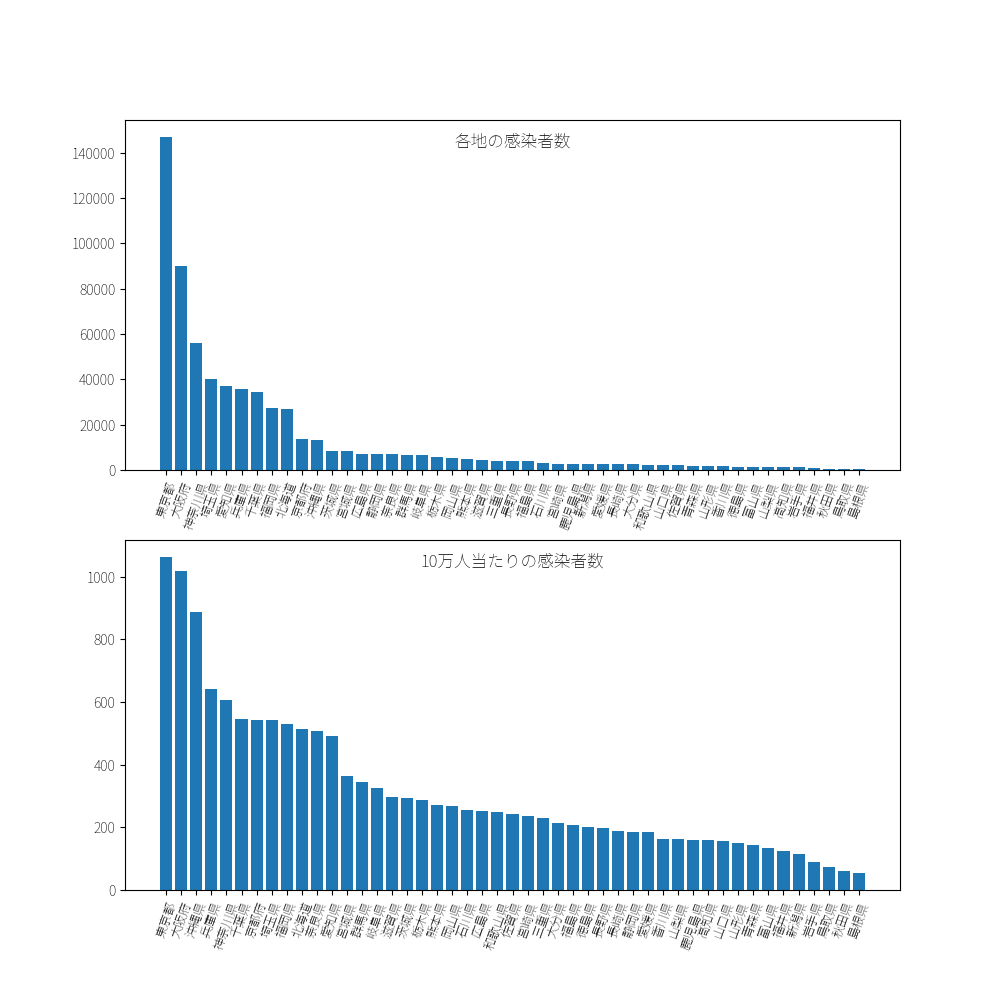

Text(0.5, 0.9, '10万人当たりの感染者数')

In [12]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_100k["10万人当たりの感染者数"])
plt.title("10万人当たりの感染者数",y=0.9)


## 度数分布表

In [13]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   379.   18727.5  37076.   55424.5  73773.   92121.5 110470.  128818.5
 147167. ]


## ヒストグラム

<IPython.core.display.Javascript object>


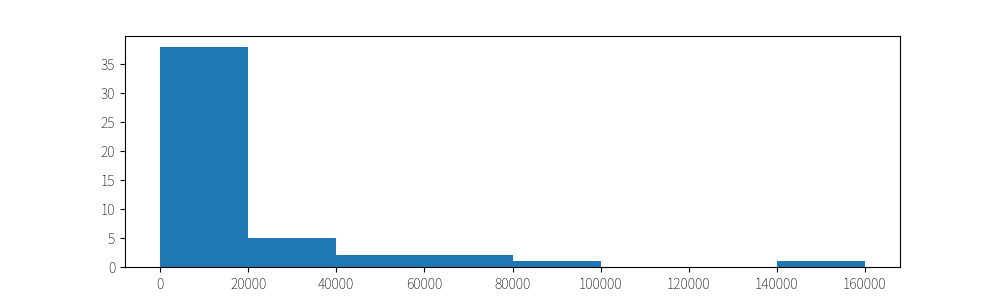

(array([38.,  5.,  2.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [14]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


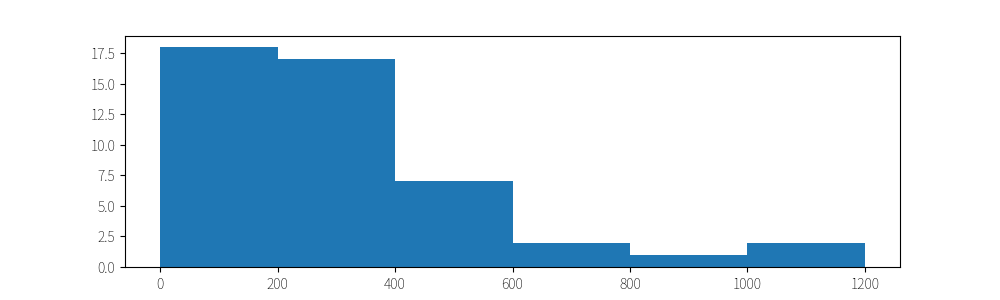

(array([18., 17.,  7.,  2.,  1.,  2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [15]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
